# Overview results for Coke2Vec
Evaluation metrics for different values of parameter k

In [1]:
import requests
import xmltodict
import fnmatch
import os


url = "https://storage.googleapis.com/public_bucket_raf"
response = requests.get(url)
data = xmltodict.parse(response.content)

files_all_products = [d['Key'] for d in data['ListBucketResult']['Contents']]
files_all_products = fnmatch.filter(files_all_products, 'coke2vec_results/all_products/*')
files_all_products = [os.path.join(url, file) for file in files_all_products]

files_new_products = [d['Key'] for d in data['ListBucketResult']['Contents']]
files_new_products = fnmatch.filter(files_new_products, 'coke2vec_results/new_products_only/*')
files_new_products = [os.path.join(url, file) for file in files_new_products]

In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import qgrid

## Scores all products

In [3]:
columns = ['f1_micro', 'f1_macro', 'mapk', 'p@k', 'r@k']

In [4]:
df_all_products = pd.concat([pd.read_csv(f, index_col=0) for f in files_all_products], ignore_index = True)
# Remove some superfluous metrics
df_all_products = df_all_products.drop(['ap','ar','ma'], axis=1)
# Let's group the results by configuration, k value and threshold value. 
df_all_products_grouped = df_all_products.groupby(['threshold', 'k', 'config_name']).mean()

In [5]:
# Use qgrid for quick overview
qgrid_widget = qgrid.show_grid(df_all_products_grouped)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

**Legend**
- `threshold`: a prediction probability exceeding the threshold is categorized as a recommendation. When three recommendations are allowed (k=3), the threshold parameter could make that only one or two out of three products are actually recommended. 
- `k`: the k parameter determines how many recommendations are taken into account when calculating the performance measures. In recommender systems we are interested in the first one to ten recommendations. 
- `config_name`
- `hl`: hadamard loss
- `f1_macro`: Considers each labels as equally important regardless of absolute number of instances associated to the label. Will calculate an F1 score for each label separately and calculate an average.  
- `f1_micro`: Calculate metrics globally by counting the total true positives, false negatives and false positives.
[Micro vs. Macro](https://i.stack.imgur.com/HQCrS.png)
- `f1_average`: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
- `mapk`: Mean-Average Precision at k
- `nans p@k`: Nan values for precision at k
- `nans r@k`: Nan values for recall at k
- `p@k`: Precision at k
- `r@k`: Recall at k 
- `rows_with_k_recommendations`: One would expect exactly k recommendations, although high treshold values could result in less than k recommendations. See below. 
- `rows_with_less_than_k_recommendations`: high threshold values can result in less than k observations being recommended

See [Github Wiki](https://github.com/rafaelvanbelle/coca_cola_b2b/wiki/Classifier-evaluation) for explanation of classifier performance metrics. 

### Threshold 0.5, k=1

In [6]:
df_all_products_grouped.loc[(0.5, 1), columns].round(3).sort_values(by='mapk', ascending=False)

,f1_micro,f1_macro,mapk,p@k,r@k
config_name,,,,,
Benchmark: popular vote,0.229,0.022,0.920,0.681,0.162
Benchmark: Multi-label classification with extended RFM features,0.782,0.490,0.912,0.771,0.175
Random Forest with original features without vector space translation,0.561,0.130,0.899,0.710,0.155
Random Forest without vector space translation,0.559,0.129,0.899,0.710,0.155
Benchmark: implicit feedback,0.776,0.608,0.886,0.886,0.171
XGBoost without vector space translation,0.587,0.240,0.843,0.700,0.143
Benchmark: Multi-label classification without network features,0.557,0.181,0.801,0.709,0.143
XGBoost with vector space translation,0.003,0.001,0.011,0.676,0.002
Benchmark: explicit feedback,0.003,0.010,0.000,0.054,0.000


### Threshold 0.5, k=3

In [7]:
df_all_products_grouped.loc[(0.5, 3), columns].round(3).sort_values(by='mapk', ascending=False)

,f1_micro,f1_macro,mapk,p@k,r@k
config_name,,,,,
Benchmark: Multi-label classification with extended RFM features,0.782,0.487,0.867,0.747,0.451
Benchmark: popular vote,0.484,0.064,0.863,0.641,0.439
Benchmark: implicit feedback,0.864,0.687,0.847,0.876,0.470
Random Forest without vector space translation,0.558,0.129,0.826,0.675,0.410
Random Forest with original features without vector space translation,0.561,0.131,0.825,0.676,0.410
Benchmark: Multi-label classification without network features,0.556,0.182,0.736,0.675,0.373
XGBoost without vector space translation,0.587,0.240,0.734,0.678,0.362
XGBoost with vector space translation,0.003,0.001,0.004,0.676,0.002
Benchmark: explicit feedback,0.003,0.009,0.000,0.099,0.000


### Threshold 0.5, k=5

In [8]:
df_all_products_grouped.loc[(0.5, 5), columns].round(3).sort_values(by='mapk', ascending=False)

,f1_micro,f1_macro,mapk,p@k,r@k
config_name,,,,,
Benchmark: implicit feedback,0.857,0.665,0.862,0.875,0.702
Benchmark: Multi-label classification with extended RFM features,0.781,0.484,0.828,0.728,0.638
Benchmark: popular vote,0.486,0.086,0.681,0.483,0.535
Random Forest with original features without vector space translation,0.558,0.128,0.626,0.659,0.470
Random Forest without vector space translation,0.559,0.129,0.626,0.659,0.470
Benchmark: Multi-label classification without network features,0.557,0.182,0.610,0.623,0.473
XGBoost without vector space translation,0.587,0.240,0.607,0.658,0.455
XGBoost with vector space translation,0.003,0.001,0.003,0.676,0.002
Benchmark: explicit feedback,0.003,0.010,0.000,0.124,0.000


**Conclusions threshold 0.5**

From the results on `MAPK` it becomes clear that the `popular vote` is by far the most effective for recommending a single product to a customer. The training data is based on 52 weeks of observations followed by a 6 months test period. When the goal is to predict consumption in the 6 months test set, the popular vote approach clearly wins. 

- `Vector space translation` doesn't work. It seems to negatively impact the results. 
- `Explicit feedback` is worthless
- `Multi-label classification with RFM features` performs quite strong (has learned which brands are popular ;)
- `Random-forest with original features without vector space translation` has similar performance as `Multi-label classification` and `popular vote`. 

- as K increases (the number of recommended products), the performance of the `popular vote` goes down. This is logical as the chances are high that somebody will buy coca-cola (the most popular product), but less likely that he will buy sprite. Hence as K increases the recommendations work for fewer and fewer customers. 

### Threshold 0.0, k=1

In [9]:
df_all_products_grouped.loc[(0.0, 1), columns].round(3).sort_values(by='mapk', ascending=False)


,f1_micro,f1_macro,mapk,p@k,r@k
config_name,,,,,
Benchmark: Multi-label classification with extended RFM features,0.390,0.248,0.957,0.714,0.189
Benchmark: popular vote,0.229,0.022,0.920,0.681,0.162
Random Forest with original features without vector space translation,0.312,0.215,0.920,0.682,0.163
Random Forest without vector space translation,0.312,0.215,0.918,0.681,0.163
Benchmark: implicit feedback,0.315,0.255,0.900,0.900,0.178
XGBoost without vector space translation,0.249,0.209,0.888,0.657,0.158
Random Forest with vector space translation,0.426,0.224,0.878,0.661,0.164
Benchmark: Multi-label classification without network features,0.366,0.230,0.868,0.663,0.159
XGBoost with vector space translation,0.249,0.209,0.857,0.634,0.157


### Threshold 0.0, k=3

In [10]:
df_all_products_grouped.loc[(0.0, 3), columns].round(3).sort_values(by='mapk', ascending=False)

,f1_micro,f1_macro,mapk,p@k,r@k
config_name,,,,,
Benchmark: Multi-label classification with extended RFM features,0.390,0.249,0.921,0.676,0.492
Random Forest with original features without vector space translation,0.312,0.215,0.864,0.642,0.443
Random Forest without vector space translation,0.312,0.215,0.864,0.642,0.443
Benchmark: popular vote,0.484,0.064,0.863,0.641,0.439
XGBoost without vector space translation,0.249,0.209,0.830,0.624,0.439
Benchmark: Multi-label classification without network features,0.367,0.231,0.819,0.626,0.430
Random Forest with vector space translation,0.425,0.224,0.803,0.615,0.430
XGBoost with vector space translation,0.249,0.209,0.765,0.584,0.411
Benchmark: implicit feedback,0.314,0.254,0.744,0.761,0.412


### Threshold 0.0, k=5

In [11]:
df_all_products_grouped.loc[(0.0, 5), columns].round(3).sort_values(by='mapk', ascending=False)

,f1_micro,f1_macro,mapk,p@k,r@k
config_name,,,,,
Benchmark: Multi-label classification with extended RFM features,0.390,0.249,0.903,0.627,0.717
Random Forest with original features without vector space translation,0.312,0.215,0.771,0.553,0.619
Benchmark: implicit feedback,0.315,0.255,0.770,0.764,0.662
Random Forest without vector space translation,0.312,0.215,0.770,0.552,0.619
XGBoost without vector space translation,0.249,0.209,0.765,0.552,0.622
Benchmark: Multi-label classification without network features,0.367,0.230,0.727,0.535,0.592
Random Forest with vector space translation,0.427,0.223,0.720,0.535,0.599
XGBoost with vector space translation,0.249,0.209,0.707,0.524,0.591
Benchmark: popular vote,0.486,0.086,0.681,0.483,0.535


**Conclusions threshold 0.0**

changing the threshold has an impact on all measures. This is caused by the way in which the classifier is evaluated. The evaluation will explicitly check the predicted probabilities and only recommend a product if the probability exceeds the threshold. 

`Popular vote` performance is roughly the same. (I am not sure why, but probably because of the way in which the probabilities have been configured and are all above 0.5. 

For `K=3`, no big surprises: `popular vote` is doing a bit worse, `Multi-label classification` is doing great, the embedding based approaches are not doing great (not much better than `popular vote`)

For `K=5`, the performance of `popular vote` is considerably worse. `Implicit feedback` is doing great. Most important observation is `Multi-label classification` keeping a strong performance, while performance of embedding based approaches sinks away.

## Scores new products only

Because of the strong performance of the simple popularity vote in the previous experiments, the next round of experiments will only look for 'new products' not bought by the client in the past year.

The setup remains identical: 52 weeks of training data, 6 months of test data. For every client the model is asked to recommend the brands most likely to be bought by the client during the next 6 months based on the 52 weeks of history.

In [12]:
df_new_products = pd.concat([pd.read_csv(f, index_col=0) for f in files_new_products], ignore_index = True)
# Remove some superfluous rows
df_new_products = df_new_products.drop(['ap','ar','ma'], axis=1)
# Let's group the results by configuration, k value and threshold value. 
df_new_products_grouped = df_new_products.groupby(['threshold', 'k', 'config_name']).mean()

In [13]:
# Use qgrid for quick overview
qgrid_widget = qgrid.show_grid(df_new_products_grouped)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Threshold = 0.5, k=1

In [14]:
df_new_products_grouped.loc[(0.5, 1), columns].round(3).sort_values(by='mapk', ascending=False)

,f1_micro,f1_macro,mapk,p@k,r@k
config_name,,,,,
Benchmark: Multi-label classification with extended RFM features,0.194,0.060,0.148,0.733,0.128
Benchmark: implicit feedback,0.085,0.075,0.080,0.080,0.056
Benchmark: Multi-label classification without network features,0.056,0.023,0.038,0.230,0.030
"without vector space translation, with extended RFM features",0.036,0.012,0.026,0.820,0.022
XGBoost without vector space translation,0.036,0.013,0.025,0.358,0.021
Benchmark: popular vote,0.019,0.001,0.022,0.022,0.011
Random Forest with original features without vector space translation,0.002,0.000,0.002,0.627,0.002
Benchmark: explicit feedback,0.004,0.010,0.000,0.214,0.001


### Threshold = 0.5, k=3

In [15]:
df_new_products_grouped.loc[(0.5, 3), columns].round(3).sort_values(by='mapk', ascending=False)

,f1_micro,f1_macro,mapk,p@k,r@k
config_name,,,,,
Benchmark: implicit feedback,0.085,0.074,0.162,0.118,0.223
Benchmark: Multi-label classification with extended RFM features,0.193,0.058,0.130,0.730,0.130
Benchmark: popular vote,0.058,0.007,0.045,0.042,0.079
Benchmark: Multi-label classification without network features,0.053,0.022,0.029,0.200,0.030
XGBoost without vector space translation,0.036,0.013,0.022,0.358,0.022
"without vector space translation, with extended RFM features",0.034,0.010,0.022,0.818,0.022
Random Forest with original features without vector space translation,0.006,0.001,0.004,0.655,0.004
Random Forest without vector space translation,0.003,0.000,0.002,0.708,0.002
Benchmark: explicit feedback,0.004,0.010,0.001,0.151,0.001


### Threshold = 0.5, k=5

In [16]:
df_new_products_grouped.loc[(0.5, 5), columns].round(3).sort_values(by='mapk', ascending=False)

,f1_micro,f1_macro,mapk,p@k,r@k
config_name,,,,,
Benchmark: implicit feedback,0.090,0.076,0.183,0.122,0.311
Benchmark: Multi-label classification with extended RFM features,0.191,0.057,0.128,0.735,0.128
Benchmark: popular vote,0.107,0.018,0.084,0.068,0.249
Benchmark: Multi-label classification without network features,0.057,0.023,0.032,0.211,0.034
"without vector space translation, with extended RFM features",0.037,0.012,0.023,0.859,0.023
XGBoost without vector space translation,0.036,0.013,0.021,0.358,0.022
Random Forest with original features without vector space translation,0.003,0.001,0.002,0.637,0.002
Benchmark: explicit feedback,0.004,0.010,0.001,0.139,0.001


### Threshold = 0.0, k=1

In [17]:
df_new_products_grouped.loc[(0.0, 1), columns].round(3).sort_values(by='mapk', ascending=False)

,f1_micro,f1_macro,mapk,p@k,r@k
config_name,,,,,
Benchmark: Multi-label classification with extended RFM features,0.115,0.093,0.340,0.344,0.287
"without vector space translation, with extended RFM features",0.098,0.080,0.325,0.334,0.275
Random Forest with original features without vector space translation,0.095,0.078,0.224,0.234,0.200
XGBoost without vector space translation,0.079,0.076,0.167,0.165,0.134
Benchmark: Multi-label classification without network features,0.109,0.080,0.152,0.156,0.131
Benchmark: implicit feedback,0.072,0.069,0.139,0.139,0.106
Benchmark: popular vote,0.019,0.001,0.022,0.022,0.011
Benchmark: explicit feedback,0.074,0.071,0.005,0.013,0.011


### Threshold = 0.0, k=3

In [18]:
df_new_products_grouped.loc[(0.0, 3), columns].round(3).sort_values(by='mapk', ascending=False)

,f1_micro,f1_macro,mapk,p@k,r@k
config_name,,,,,
Benchmark: Multi-label classification with extended RFM features,0.115,0.092,0.377,0.207,0.485
"without vector space translation, with extended RFM features",0.098,0.080,0.360,0.201,0.466
Random Forest with original features without vector space translation,0.095,0.078,0.253,0.146,0.349
Random Forest without vector space translation,0.095,0.078,0.253,0.145,0.347
XGBoost without vector space translation,0.079,0.076,0.206,0.123,0.289
Benchmark: Multi-label classification without network features,0.110,0.080,0.186,0.110,0.263
Benchmark: implicit feedback,0.074,0.070,0.153,0.106,0.238
Benchmark: popular vote,0.058,0.007,0.045,0.042,0.079
Benchmark: explicit feedback,0.074,0.071,0.013,0.012,0.026


### Threshold = 0.0, k=5

In [19]:
df_new_products_grouped.loc[(0.0, 5), columns].round(3).sort_values(by='mapk', ascending=False)

,f1_micro,f1_macro,mapk,p@k,r@k
config_name,,,,,
Benchmark: Multi-label classification with extended RFM features,0.115,0.092,0.404,0.158,0.606
"without vector space translation, with extended RFM features",0.097,0.080,0.388,0.152,0.581
Random Forest with original features without vector space translation,0.095,0.078,0.280,0.120,0.467
XGBoost without vector space translation,0.079,0.076,0.232,0.105,0.404
Benchmark: implicit feedback,0.075,0.071,0.212,0.114,0.427
Benchmark: Multi-label classification without network features,0.110,0.080,0.206,0.095,0.371
Benchmark: popular vote,0.107,0.018,0.084,0.068,0.249
Benchmark: explicit feedback,0.074,0.071,0.022,0.020,0.071


In [20]:
df_all_products.config_name.value_counts()

Random Forest with vector space translation                              30
Benchmark: popular vote                                                  30
Benchmark: Multi-label classification without network features           30
Benchmark: implicit feedback                                             30
Benchmark: Multi-label classification with extended RFM features         30
Random Forest with original features without vector space translation    30
XGBoost without vector space translation                                 30
Benchmark: explicit feedback                                             30
XGBoost with vector space translation                                    30
Random Forest without vector space translation                           30
Name: config_name, dtype: int64

## Visualizations

In [21]:
configs_to_visualize = ["Random Forest without vector space translation",
                        "XGBoost without vector space translation",
                       "Random Forest with original features without vector space translation",
                       "Benchmark: Multi-label classification with extended RFM features",
                       "Benchmark: Multi-label classification without network features"]

In [22]:
data_to_visualize.loc[:, 'k'] = data_to_visualize.loc[:, 'k'].astype('category')

NameError: name 'data_to_visualize' is not defined

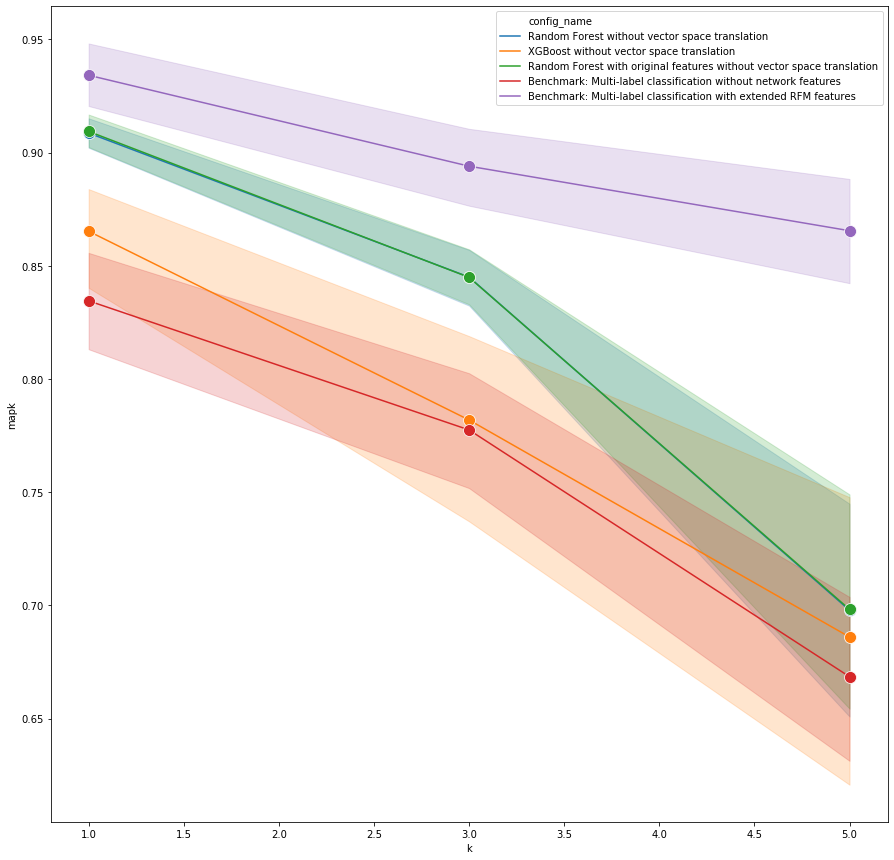

In [23]:

data_to_visualize = df_all_products[df_all_products.config_name.isin(configs_to_visualize)]
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
sns.lineplot(x="k", y="mapk",
             hue="config_name",
             
             markers=True,
             dashes=False,
             sizes=10,
             data=data_to_visualize, 
            ax = ax
            , marker='o', markersize=12
               )

## Bokeh Plotting

In [24]:
from bokeh.models import ColumnDataSource, Band, Circle, Line, Legend, LegendItem
from bokeh.plotting import figure, output_notebook, show
import itertools
from tqdm.notebook import tqdm
from bokeh.palettes import Dark2_5 as palette

output_notebook()

Loading BokehJS ...

In [25]:
# create a color iterator
colors = itertools.cycle(palette)    


# create a figure
p = figure(title="MAPK for different k-values (threshold=0)", 
           x_range=(0.5, 5.5),
           background_fill_color="#fafafa",
          toolbar_location = 'above',
          plot_width=1000)

p.xaxis.axis_label = 'k'
p.yaxis.axis_label = 'MAPK'

legend_items = []
threshold = 0

for config_name in tqdm(df_all_products.config_name.unique(), total=df_all_products.config_name.nunique()):
    subset_data = df_all_products[(df_all_products.threshold == threshold) &
                                     (df_all_products.config_name == config_name)]
    subset_data = subset_data.sort_values(by='k')
    subset_data_grouped = subset_data.groupby(['k']).agg(['mean', 'std']).reset_index()

    subset_data_grouped[('mapk', 'lower')] = subset_data_grouped[('mapk', 'mean')] - subset_data_grouped[('mapk', 'std')]
    subset_data_grouped[('mapk', 'upper')] = subset_data_grouped[('mapk', 'mean')] + subset_data_grouped[('mapk', 'std')]

    source = ColumnDataSource(subset_data_grouped)

    
    color = next(colors)
    l = p.line(x="k_", y="mapk_mean", source=source,  line_width=2, color=color)
    c = p.circle(x="k_", y="mapk_mean", source=source, color=color)
    #band = Band(base="k_", lower='mapk_lower', upper='mapk_upper', source=source, level='underlay',
    #         fill_alpha=1.0, line_width=1, line_color='black')
    #b = p.add_layout(band)
    legend_items.append((config_name, [l, c]))
    
    
legend = Legend(items= legend_items, location="center")
p.add_layout(legend, 'right')
        
p.legend.click_policy="hide"


In [26]:
show(p)

----

In [ ]:
df_subset_0 = pd.concat([pd.read_csv(f, index_col=0) for f in glob.glob('./papermill/all_products/*_subset_0.csv')], ignore_index = True)

In [ ]:
df_subset_0[df_subset_0.config_name == "Random Forest without vector space translation"]

## Results for k=3 and t=0.5 

In [ ]:
df_k3_t05 = df[(df.threshold==0.5)&(df.k == 3)]

In [ ]:
# Get the mean over 5 replications
df_k3_t05_grouped = df_k3_t05.groupby('config_name').agg(['mean', 'std']) #.mean()

In [ ]:
df_k3_t05_grouped_subset = df_k3_t05_grouped.loc[:, ['hl', 'mapk', 'f1_macro', 'f1_micro']]
# We have to update the multiindex @column level. This multiindex is not updated with .loc. Hence when we try to change
# the column names it will throw an error. Solution: remove_unused_levels().
df_k3_t05_grouped_subset.columns = df_k3_t05_grouped_subset.columns.remove_unused_levels()
#df_k3_t05_grouped_subset.columns.set_levels(['threshold','k','AP','AR' ,'Hamming loss', 'MAPK', 'F1 macro', 'F1 micro'], level=0, inplace=True)
df_k3_t05_grouped_subset.columns.set_levels(['Hamming loss', 'MAPK', 'F1 macro', 'F1 micro'], level=0, inplace=True)
df_k3_t05_grouped_subset.round(3)

In [ ]:
df_sorted = df.merge(df_k3_t05_grouped, left_on='config_name', right_on='config_name', suffixes=('', '_mean'), how='left')
df_sorted = df_sorted.sort_values(by=('ma', 'mean'), ascending=False)
ax = sns.barplot(x='config_name', y='ma', data=df_sorted,capsize=.2)
ax.set_title('Average MAPK scores over 5 replications')
ax.set_ylabel('Average MAPK')
plt.xticks(rotation=90)

plt.savefig('./images/MAPK_plot.png', bbox_inches = "tight")

-----

In [ ]:
line1 = plt.plot(x_axis, data1,'ko-',label='line1')
line2 = plt.plot(x_axis, data2,'ro-',label='line2') 
line3 = plt.plot(x_axis, data3,'mo-',label='line3')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10,8))
for config in df.config_name.unique():
    dff = df[df.config_name == config].sort_values(by='k')
    #print(dff.head())
    plt.plot('k', 'mapk', data=dff, label=config, marker='o', linestyle='')
plt.legend()
plt.title("MAPK scores for different values of k")
plt.xlabel("k")
plt.ylabel("MAPK")

plt.savefig('one.png')

In [ ]:
df.config_name.unique()

In [ ]:
configs = ['Random Forest without vector space translation',
       'XGBoost without vector space translation',
       'Random Forest with original features without vector space translation',
       'Benchmark: Multi-label classification without network features',
       'Benchmark: Multi-label classification with extended RFM features',
       'Benchmark: popular vote', 'Benchmark: explicit feedback',
       'Benchmark: implicit feedback']

In [ ]:
df_subset_configs = df[df.config_name.isin(configs)]

In [ ]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
fig, ax = plt.subplots(figsize=(15,15))

# Draw a nested boxplot to show bills by day and time

ax = sns.boxplot(x="k", y="mapk",
            hue="config_name",
            data=df_subset_configs, ax=ax)


In [ ]:
plt.figure(figsize=(10,8))
for config in df.config_name.unique():
    dff = df[df.config_name == config].sort_values(by='k')
    plt.plot('k', 'hl', data=dff, label=config, marker='o')
plt.legend()
plt.title("Hamilton loss scores for different values of k")
plt.xlabel("k")
plt.ylabel("Hamilton Loss")

plt.savefig('two.png')

In [ ]:
axes.flatten()

In [ ]:
measures[0]

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(15,15))
measures = ['ap', 'ar', 'ma', 'f1_macro', 'f1_micro','f1_average']
for i, axi in enumerate(axes.flatten()):
    for config in df.config_name.unique():
        dff = df[df.config_name == config].sort_values(by='k')
        axi.plot('k', measures[i], data=dff, label=config, marker='o')
    #axi.legend()
    axi.set_title(measures[i]+" scores for different values of k")
    axi.set_xlabel("k")
    axi.set_ylabel(measures[i])
handles, labels = axi.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.savefig('three.png')